## Titanic Survival Exploration with Decision Trees


> In this notebook,we will be seeing how decision trees work by implementing a decision tree in sklearn.


## Description

<img style="float: centre;" src="Titanic.jpeg" width="600">  

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

##### What type of people were likely to survive the incident? 
##### Apply the tools of machine learning to predict which passengers survived the tragedy.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline

In [2]:
# Load the dataset
TD = pd.read_csv('titanic_data.csv')

In [3]:
# Print the first few entries of the RMS Titanic data
#display(full_data.tail())

TD.head(15)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   

    Parch            Ticket     Fare Cabin Embarked  
0       0         A/5 21171   7.2500   NaN        S  
1       0          PC 17599  71.2833   C85        C  
2       0  STON/O2. 3101282   7.9250   NaN        S  
3       0            113803  53.1000  C123        S  
4       0            373450   8.0500   NaN        S  
5       0            330877   8.4583   NaN        Q  
6       0             17463  51.8625   E46        S  
7       1            349909  21.0750   NaN        S  
8       2            347742  11.1333   NaN        S  
9       0            237736  30.0708   NaN        C  
10      1           PP 9549  16.7000    G6        S  
11      0            113783  26.5500  C103        S  
12      0         A/5. 2151   8.0500   NaN        S  
13      5            347082  31.2750   NaN        S  
14      0            350406   7.8542   NaN        S

In [4]:
#Statistical data
#TD.describe()
#TD.dtypes
#TD.notna()
#TD.

These are the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [5]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = TD['Survived']
features_raw = TD.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(features_raw.head())

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcomes[i]`.

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

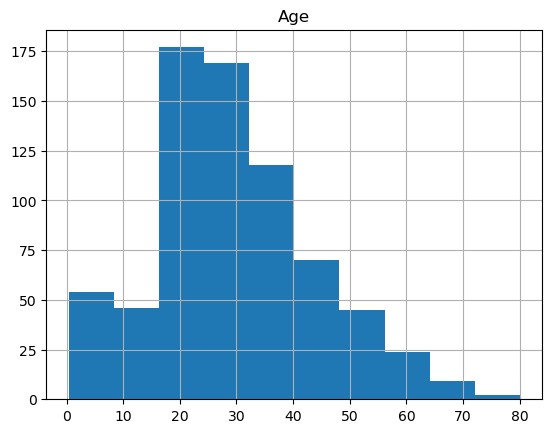

In [6]:
#EDA and visualisation
#Age distribution

TD.hist(column="Age")

<AxesSubplot:xlabel='Pclass'>

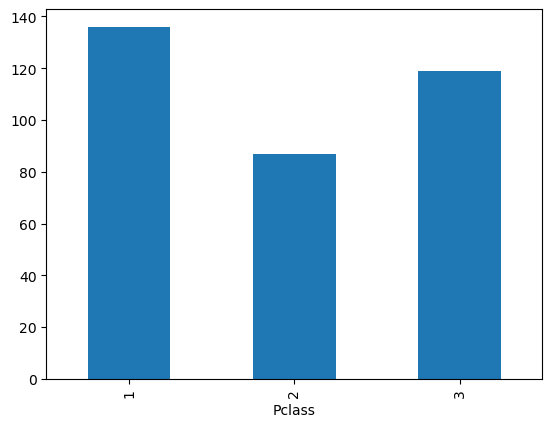

In [7]:
#Passenger Class
TD.groupby('Pclass').Survived.sum().plot(kind='bar')

<AxesSubplot:xlabel='Sex'>

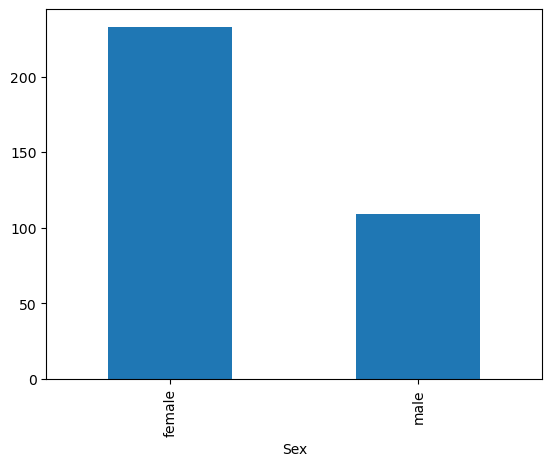

In [8]:
#Gender and survived

TD.groupby('Sex').Survived.sum().plot(kind='bar')

#More Analysis 
Who was the oldest passenger aboard the ship? (Hint, .max(column)) 
How much did the cheapest ticket cost? (Hint, .min(column)) 
How many people below 20 survived? 


## Preprocessing the data

Now, let's do some data preprocessing. First, we'll remove the names of the passengers, and then one-hot encode the features.

One-Hot encoding is useful for changing over categorical data into numerical data, with each different option within a category changed into either a 0 or 1 in a separate *new* category as to whether it is that option or not (e.g. Queenstown port or not Queenstown port). 

In [9]:
# Removing the names
features_no_names = features_raw.drop(['Name'], axis=1)

# One-hot encoding
features = pd.get_dummies(features_no_names)

And now we'll fill in any blanks with zeroes.

In [10]:
features = features.fillna(0.0)
display(features.head())

PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0            1       3  22.0      1      0   7.2500           0         1   
1            2       1  38.0      1      0  71.2833           1         0   
2            3       3  26.0      0      0   7.9250           1         0   
3            4       1  35.0      1      0  53.1000           1         0   
4            5       3  35.0      0      0   8.0500           0         1   

   Ticket_110152  Ticket_110413  ...  Cabin_F G73  Cabin_F2  Cabin_F33  \
0              0              0  ...            0         0          0   
1              0              0  ...            0         0          0   
2              0              0  ...            0         0          0   
3              0              0  ...            0         0          0   
4              0              0  ...            0         0          0   

   Cabin_F38  Cabin_F4  Cabin_G6  Cabin_T  Embarked_C  Embarked_Q  Embarked_S  
0          0         0         0        0           0           0           1  
1          0         0         0        0           1           0           0  
2          0         0         0        0           0           0           1  
3          0         0         0        0           0           0           1  
4          0         0         0        0           0           0           1  

[5 rows x 839 columns]

## Training the model

Now we're ready to train a model in sklearn. First, let's split the data into training and testing sets. Then we'll train the model on the training set.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [12]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Testing the model
Now, let's see how our model does, let's calculate the accuracy over both the training and the testing set.

In [13]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [14]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.8156424581005587


## Improving the model

Ok, high training accuracy and a lower testing accuracy. We may be overfitting a bit.

So now we will train a new model, and try to specify some parameters in order to improve the testing accuracy, such as:
- `max_depth`
- `min_samples_leaf`
- `min_samples_split`



Here, our **challenge** is to get to 85% accuracy on the testing set.

In [15]:
# Training the model
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)
model.fit(X_train, y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.8707865168539326
The test accuracy is 0.8547486033519553
